# De-recursion

Many times, recursion gives us a clean way to __think__ about problems and __solve__ them.

But a recursive program is often __slower__ than non recursive version.

So sometimes, after finding a recursive solution, we want to transform it to a non recursive solution.

Understanding how the non recursive function also helps us understand the recursive version better.

## Example: Binary Search 

Recall the recursive code for binary search:

In [1]:
def bin_search(L,item):
    n = len(L)
    if n==0:
        return -1
    m = int(n/2)
    if L[m]==item:
        return m
    if L[m]>item:
        return bin_search(L[:m],item)
    res = bin_search(L[m+1:n],item)
    return -1 if res==-1 else m+1+res

To make it non recursive we will do the following:

In [2]:
def bin_search_nr(L,item):
    left = 0
    right= len(L)
    while right-left >0:
        m = int((left+right)/2)
        if L[m]==item:
            return m
        if L[m]>item:
            right = m
        else:
            left  = m+1
    return -1

In [3]:
L = range(0,200,2)

In [4]:
bin_search_nr(L,100)

50

In [5]:
bin_search_nr(L,101)

-1

## Example 2: Selection sort

In [6]:
def find_min_index(L):
    current_index = 0
    current_min = L[0]
    for j in range(1,len(L)):
        if current_min > L[j]:
            current_min = L[j]
            current_index = j
    return current_index

In [7]:
def selection_sort(L):
    if len(L)<=1:   
        return L # a one-element list is always sorted
    min_idx = find_min_index(L) #non-recursive helper function
    L[0], L[min_idx] = L[min_idx], L[0] 
    return [L[0]] + sort(L[1:len(L)])

In [8]:
def selection_sort_nr(L):
    for i in range(len(L)):
        min_idx = i+find_min_index(L[i:])
        L[i], L[min_idx] = L[min_idx], L[i]
    return L

In [9]:
selection_sort_nr([3,1,4,1,5,9,2])

[1, 1, 2, 3, 4, 5, 9]

## Example 3: Merge sort

In [10]:
def merge_lists(L1,L2):
    i=0
    j=0
    res = []
    while i<len(L1) and j<len(L2):
        if L1[i] < L2[j]:
            res.append(L1[i])
            i += 1
        else:
            res.append(L2[j])
            j += 1
    res += L1[i:]+L2[j:]
    return res

In [11]:
def merge_sort(L):
    if len(L) <= 1:
        return L
    m = int(len(L)/2)
    L1 = merge_sort(L[0:m])
    L2 = merge_sort(L[m:])
    return merge_lists(L1,L2)

In [12]:
merge_sort([3,1,4,1,5,9,2])

[1, 1, 2, 3, 4, 5, 9]

In [13]:
def merge_sort_nr(L):
    lists = [ [x] for x in L]
    while len(lists)>1:
        new_lists = []
        if len(lists) % 2:
            lists.append([])
        for i in range(0,len(lists)-1,2):
            new_lists.append(merge_lists(lists[i],lists[i+1]))
        lists = new_lists
    return lists[0]

In [14]:
merge_sort_nr([3,1,4,1,5,9,2])

[1, 1, 2, 3, 4, 5, 9]

# Graphs

Often in computation we have __data__ from the world, and a __question__ we want to answer about these data.

To do so, we need to find a __model__ for the data, and a way to translate our question into a __mathemtical question about the model__

Here are some examples:

* Suppose you have a map of Addis Ababa and want to find out what's the fastest way to get from the national museum to the market.

* Suppose you are Facebook and you are trying to figure out how many friends of friends does the average Ethiopean has.

* Suppose you are a geneticist, and are trying to figure out which genes are related to a particular type of colon cancer.



![title](addis_map.jpg)

What is perhaps most surprising is that these and any many other questions, all use the same mathematical model of a __graph__ 

A __graph__ is just a way to store __connections__ between pairs of entities:

* The graph of Addis's roads could be composed of all street intersections, with a connection between intersection $u$ and intersection $v$ if they are directly connected by a road.

* The Facebook graphs is composed of all Facebook users, with a connection between user $u$ and user $v$ if they are friends.

* The gene-symptom interaction graph is composed of all genes and all "symptoms" (also known as phenotypes: some observable differences in people), where gene $u$ is connected to symptom $v$ if there is a correlation between people having the gene $u$ and symptom $v$. 

Mathematically, a graph is a set $V$ of __vertices__ and a set $E$ of pairs of these vertices which is known as the set of __edges__. We say that a vertex $u\in V$ is connected to $v\in V$ if the pair $(u,v)$ is in $E$.

A graph where $(u,v)\in E$ if and only if $(v,u)\in E$ is known as an __undirected__ graphs. Undirected graphs form an important special case, and we will mostly be interested in those graphs. 

Sometimes the edges (or vertices) of the graph are __labeled__ (often by a number), for example in the case of the road network, we might label every road segment with the average time it takes to travel from one end to the other.

There are two main representations for graphs. We can always assume the vertices are simply identified by the numbers $1$ to $n$ for some $n$. 

The __adjacency list representation__ is an array $L$ where $L[i]$ is the list of all neighbors of the vertex $i$ (i.e., all $j$ such that $(i,j)\in E$)

The __adjacency matrix representation__ is an $n\times n$ two-dimensional array $M$ (i.e., matrix) such that $M[i][j]$ equals $1$ if $j$ is a neighbor of $i$ and equals $0$ otherwise.

### Questions

* If a graph has $n$ vertices and $m$ edges - how big is its adjacency list representation? how big  is its adjacency matrix representation?

* Given a graph $G$ on $n$ vertices and two vertices $i,j$, how long can it take us (in the worst case) to find out if $j$ is a neighbor of $i$ when $G$ is represented in the adjacenecy list form? How long will it take in the adjacenecy matrix form?

### Examples:

In [16]:
G = [[1],[2],[3],[0]]

shell_layout


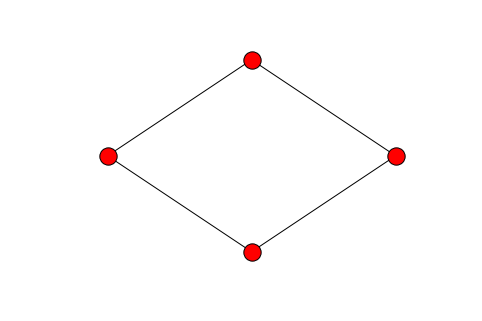

In [17]:
draw_graph(G)

shell_layout


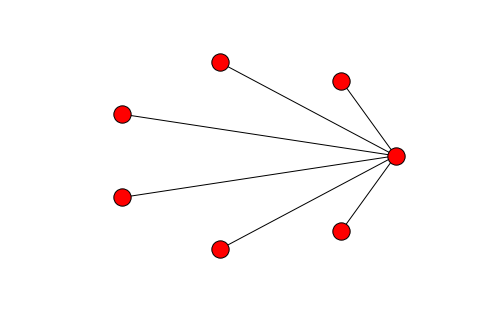

In [21]:
G = [[1,2,3,4,5,6]]
draw_graph(G)

spectral_layout


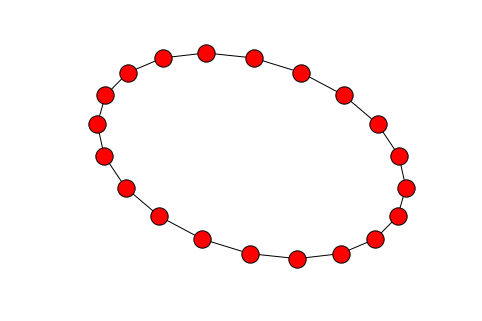

In [23]:
n = 20
G = [ [(i+1) % n] for i in range(n) ]
draw_graph(G)

In [24]:
def grid_neighbors(i,j,n):
    if i==n-1 and j== n-1: return []
    if i==n-1:
        return [i*n+j+1]
    if j==n-1:
        return [(i+1)*n+j]
    return [n*i+((j+1) % n), n*((i+1) % n)+j] 

In [25]:
n = 5
G = [ grid_neighbors(i,j,n) for i in range(n) for j in range(n)  ]

grid_layout


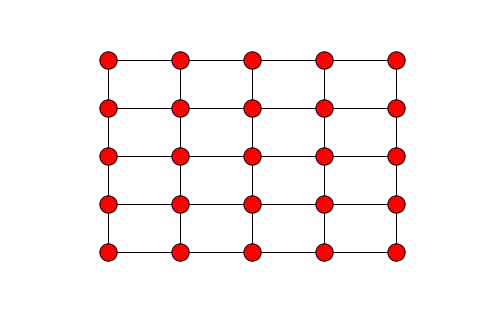

In [26]:
draw_graph(G,'grid_layout')

### Graph connectivity

Given $i,j$ and a graph $G$: find out if $j$ is connected to $i$ (perhaps indirectly) in the graph

Here is a natural suggestion for a recursive algorithm:

$connected(i,j,G)$ is True if $i$ is a neighbor of $j$, and otherwise it is True if there is some neighbor $k$ of $i$ such that $k$ is connected to $j$. 

Let's code it up try to see what happens:

In [27]:
def connected(i,j,G):
    sys.stdout.write('.')
    if j in G[i]: 
        return True
    return any([connected(k,j,G) for k in G[i]])

In [28]:
def undir(G):
    n = max(max(G[i]) if G[i] else 0 for i in range(len(G)))
    n = max(n+1,len(G))
    _G = [[] for i in range(n)]
    for i in range(len(G)): 
        for j in G[i]:
            if not j in _G[i]:
                _G[i].append(j)
            if not i in _G[j]:
                _G[j].append(i)
    return _G

spectral_layout


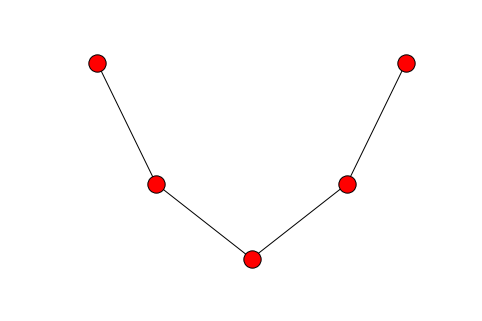

In [29]:
G = [[1],[2],[3],[4],[]]
draw_graph(G)

In [30]:
G = undir(G)
G

[[1], [0, 2], [1, 3], [2, 4], [3]]

In [31]:
connected(0,1,G)

.

True

In [32]:
connected(0,2,G)

..

True

In [33]:
connected(0,3,G)

.............................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

RuntimeError: maximum recursion depth exceeded while calling a Python object

The problem is that we are getting into an infinite loop! 
We can fix this by remembering which vertices we visited.

In [34]:
def grid_input(n): # return a n by n grid with an isolated vertex
    G = [ grid_neighbors(i,j,n) for i in range(n) for j in range(n)  ]
    G.append([])
    G = undir(G)
    return (0,len(G)-1,G)

In [35]:
def connected(source,target,G):
    added = [False for i in range(len(G))]
    added[source] = True
    to_visit = [source] # to visit: list of vertices that are definitely connected to the source
    while to_visit:
        step_pc() # count how many times the while loop is executed
        i = to_visit.pop()
        if i==target:
            return True
        for j in G[i]:
            if not added[j]:
                added[j] = True
                to_visit.append(j)
    return False
    

spring100_layout


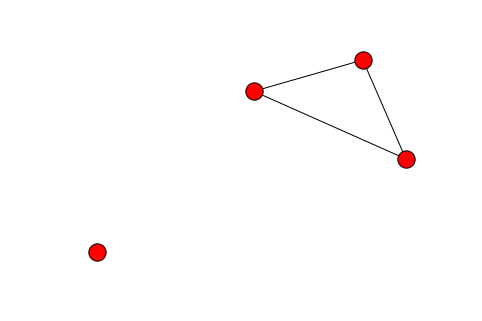

In [36]:
G = undir([[1],[2],[0],[]])
draw_graph(G)

In [37]:
print connected(0,1,G) , connected(0,3,G)

True False


-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
.......................................................................................................................................................................................................
0.684 micro-seconds per step
(array([4], dtype=int64),)
Curve (steps): $n$


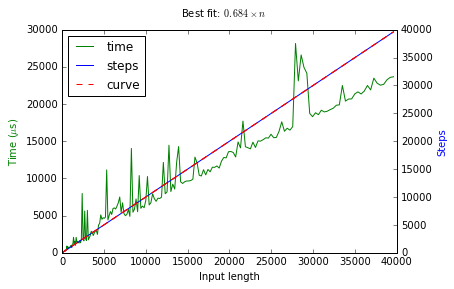

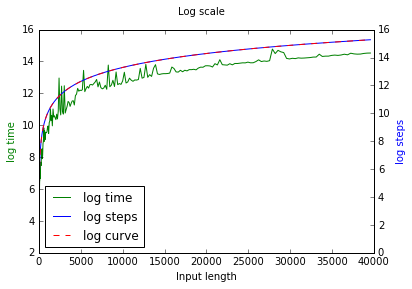

In [24]:
# running time of connectivity algorithm

Let's see how the evolution of the algorithm looks on a typical graph:



In [38]:
def connected_viz(source,target,G,layout_method=None):
    initialize_animation(G,my_layout_method=layout_method)
    visited = [False for i in range(len(G))]
    to_visit = [source] # to visit: list of vertices that are definitely connected to the source
    while to_visit:
        step_pc() # count how many times the while loop is executed
        i = to_visit.pop()
        color(i,'r') # red: observed
        if i==target:
            return True
        visited[i] = True
        for j in G[i]:
            if not visited[j]:
                to_visit.append(j)
                color(j,'g') # green: waiting to be visited
    return False
    

In [41]:
(s,t,G) = grid_input(5)

grid_layout


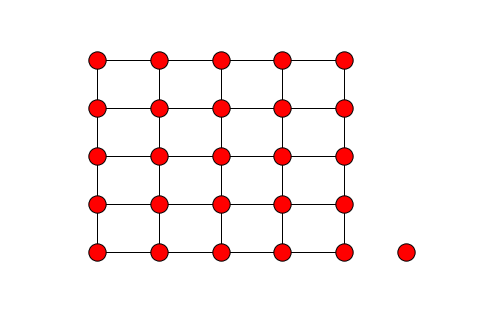

In [42]:
draw_graph(G,'grid_layout')

False

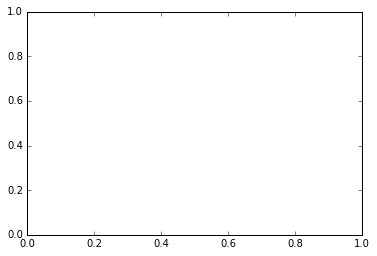

In [43]:
connected_viz(s,t,G,'grid_layout')

saving..
rendering..


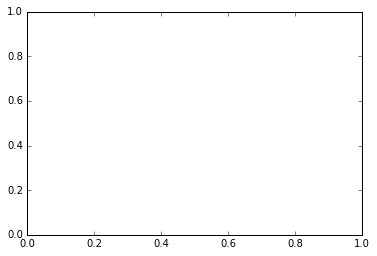

In [44]:
show_animation()

## LIFO vs FIFO


In [45]:
def connected_FIFO(source,target,G):
    added = [False for i in range(len(G))]
    added[source] = True
    to_visit = [source] # to visit: list of vertices that are definitely connected to the source
    while to_visit:
        i = to_visit.pop(0) # remove first element
        if i==target:
            return True
        for j in G[i]:
            if not added[j]:
                added[j] = True
                to_visit.append(j)
    return False
    

In [46]:
def connected_FIFO_viz(source,target,G, layout_method = None):
    initialize_animation(G,my_layout_method=layout_method)
    added = [False for i in range(len(G))]
    added[source] = True
    to_visit = [source] # to visit: list of vertices that are definitely connected to the source
    while to_visit:
        step_pc() # count how many times the while loop is executed
        i = to_visit.pop(0) # remove first element
        color(i,'r') # red: observed
        if i==target:
            return True
        for j in G[i]:
            if not added[j]:
                added[j] = True
                to_visit.append(j)
                color(j,'g') # green: added to queue
    return False

saving..
rendering..


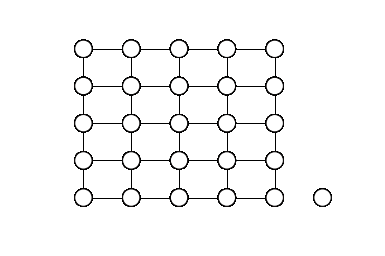

In [47]:
(s,t,G) = grid_input(5)
connected_FIFO_viz(s,t,G,'grid_layout')
show_animation()

The function ```connected``` is known as __depth first search__ and ```connected_FIFO``` is known as __breadth first search__

# Wrapping up

This week you actually managed to do some pretty impressive work - __congratulations__ 

What I hope you learned:

* Coding is about __understanding what problem you need to solve__ then  __breaking it into smaller problems__

* This is not about typing or computers but about __thinking__, just like math.

My main hope:

* This got you excited about learning more about computer science.

## Ask me anything.

* About computer science
* About Harvard
* About studying in the u.s.
* Anything else

# Thank you for a great week!!

You are always welcome to contact me:

Email: ```b@boazbarak.org```

Web page: ```http://www.boazbarak.org```

# Lab work

### Exercise 1

Implement a function ```hasElementSum(n, L)``` where ```n``` is an ```int``` and ```L``` is a list of ```int```s. The function should return
```False``` if no two distinct elements in ```L``` sum to ```n```, and otherwise it should return a list of size two, where the
elements of the returned list are two elements in ```L``` which sum to ```n```. There can be multiple valid return values.

In [ ]:
def hasElementSum(n, L):
    # write your code here
    pass

print hasElementSum(5, [1,2,3,4])
# can return either [1,4], [4,1], [2,3], or [3,2]

print hasElementSum(8, [1,2,3,4])
# should return False

print hasElementSum(4, [2,2])
# should return [2,2]

### Exercise 2

Implement a function ```hasElementSumSorted(n, L)``` where ```n``` is an ```int``` and ```L``` is a <b>sorted</b> list of ```int```s. The function should return
```False``` if no two distinct elements in ```L``` sum to ```n```, and otherwise it should return a list of size two, where the
elements of the returned list are two elements in ```L``` which sum to ```n```. There can be multiple valid return values. Your code should be able to handle lists of very large size (for example, of size one million). <b>Hint</b>:
use binary search.

In [7]:
# now L is sorted, from smallest to biggest
def hasElementSumSorted(n, L):
    # write your code here
    pass

print hasElementSumSorted(750000, range(1,1000000))
# there are many correct return values [a,b], but a+b should sum to 750,000, be different, and be in the range
# from 1 to 999,999

None


### Exercise 3

Define a function ```flooredSquareRoot(n)``` which takes a positive ```int``` or ```long``` ```n``` and computes its square root, rounded down to the nearest integer. Python has a buit-in ```sqrt``` function which could be helpful here, but don’t use it. You also should not use the exponentiation operator ```**```. Your code should run
quickly as long as ```n``` is not bigger than ```1,000,000```.

In [ ]:
def flooredSquareRoot(n):
    # write your code here
    pass

print flooredSquareRoot(10)
# should print 3

print flooredSquareRoot(25)
# should print 5

print flooredSquareRoot(1000001)
# should print 1000

### Exercise 4

Write a function ```flooredSquareRootFast(n)``` which works just as above, but is fast even for very large numbers (see below). Use binary search.

In [ ]:
def flooredSquareRootFast(n):
    # write your code here
    pass

t = 10**50 + 1
print flooredSquareRootFast(t)
# should print 10000000000000000000000000 (that's 25 zeroes)
# note: if you didn't use the Fast version, this would take a really long time!

### Exercise 5

Implement a function ```calcNthSmallest(n, intervals)``` which takes as input a nonnegative int ```n```, and a list of intervals [[a<sub>1</sub> , b<sub>1</sub> ], . . . , [a<sub>m</sub> , b<sub>m</sub> ]] and calculates the nth smallest number
(0-indexed) when taking the union of all the intervals with repetition. For example, if the intervals
were [1, 5], [2, 4], [7, 9], their union with repetition would be {1, 2, 2, 3, 3, 4, 4, 5, 7, 8, 9} (note 2, 3, 4
each appear twice since they’re in both the intervals [1, 5] and [2, 4]). For this list of intervals, the
0th smallest number would be 1, and the 3rd and 4th smallest would both be 3.
Your implementation should run quickly even when the a<sub>i</sub>, b<sub>i</sub> can be very large (like, one trillion),
and there are several intervals (use binary search). First try a version without binary search that works fast when the a<sub>i</sub> and b<sub>i</sub> are small.

You may find it useful to implement the helper functions below.

In [ ]:
# compute the index of the first time x appears in the union of intervals
def firstTime(x, intervals):
    pass

# compute the index of the last time x appears in the union of intervals
def lastTime(x, intervals):
    pass

def calcNthSmallest(n, intervals):
    # write your code here
    pass